In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ETL

In [5]:
# Directorio de lso archivos .csv originales
directorio = '..//data'

In [3]:
# Lista vacia para almacenar los archivos
dataframe = []

In [7]:
# Recorrer todos los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio, archivo)
        # Leer el archivo CSV y añadirlo a la lista
        df = pd.read_csv(archivo_csv, encoding='latin1')
        dataframe.append(df)

C:\Users\jhcat\AppData\Local\Temp\ipykernel_3876\4258319152.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv, encoding='latin1')
C:\Users\jhcat\AppData\Local\Temp\ipykernel_3876\4258319152.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv, encoding='latin1')


In [8]:
# Concatenar los Dataframes
df_ITA_Data = pd.concat(dataframe, ignore_index=True)

In [2]:
df_ITA_Data = pd.read_csv('..//data//ITA_Data.csv')

In [3]:
df_ITA_Data = df_ITA_Data.drop(columns=['ï»¿id', 'change_reason', 'ein', 'id'])

In [6]:
# Para eliminar una fila por índice
df_ITA_Data = df_ITA_Data.drop(index=2065546)

In [10]:
# Reset al indice
df_ITA_Data.reset_index(drop=True, inplace=True)

In [21]:
# Eliminar espacios en blanco de los nombres de las columnas
df_ITA_Data.columns = df_ITA_Data.columns.str.strip()

# Lista de columnas que deseas convertir
colum_convertir = ['zip_code', 'naics_code', 'annual_average_employees', 'total_hours_worked', 'no_injuries_illnesses', 'total_deaths', 'total_dafw_cases', 'total_djtr_cases', 'total_other_cases', 'total_dafw_days', 'total_djtr_days', 'total_injuries', 'total_poisonings', 'total_respiratory_conditions', 'total_skin_disorders', 'total_hearing_loss', 'total_other_illnesses', 'establishment_id', 'establishment_type', 'size', 'year_filing_for']

# Asegúrate de que todas las columnas existen en el DataFrame
colum_convertir = [col for col in colum_convertir if col in df_ITA_Data.columns]

# Convertir valores no numéricos a NaN y llenar NaN con 0
for col in colum_convertir:
    df_ITA_Data[col] = pd.to_numeric(df_ITA_Data[col], errors='coerce').fillna(0)

df_ITA_Data[colum_convertir] = df_ITA_Data[colum_convertir].astype(int)

In [9]:
df_ITA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477572 entries, 0 to 2477571
Data columns (total 28 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   company_name                  object
 1   establishment_name            object
 2   street_address                object
 3   city                          object
 4   state                         object
 5   zip_code                      int64 
 6   naics_code                    int64 
 7   industry_description          object
 8   annual_average_employees      int64 
 9   total_hours_worked            int64 
 10  no_injuries_illnesses         int64 
 11  total_deaths                  int64 
 12  total_dafw_cases              int64 
 13  total_djtr_cases              int64 
 14  total_other_cases             int64 
 15  total_dafw_days               int64 
 16  total_djtr_days               int64 
 17  total_injuries                int64 
 18  total_poisonings              int64 
 19  

In [26]:
pd.set_option('display.max_columns', None)
df_ITA_Data.head()

,company_name,establishment_name,street_address,city,state,zip_code,naics_code,industry_description,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp
0,"McKamish, Inc.","McKamish, Inc.",50 55th Street,Pittsburgh,PA,15201,238220,"Heating, ventilation and air-conditioning (HVA...",280,579688,1,0,1,1,4,35,30,6,0,0,0,0,0,41920,1,3,2016,8/1/2017 6:12:00
1,"The Talaria Company, LLC",The Hinckley Company,40 Industrial Way,Trenton,ME,4605,336612,Pleasure boats manufacturing,246,501578,1,0,2,6,5,93,143,13,0,0,0,0,0,41922,1,3,2016,8/1/2017 6:23:00
2,Williamsburg Manufacturing,Williamsburg Manufacturing,408 Maplewood Ave,Williamsburg,IA,52361,336370,Motor vehicle metal parts stamping,273,619945,1,0,5,13,0,203,1017,18,0,0,0,0,0,41923,1,3,2016,8/1/2017 6:27:00
3,"The Talaria Company, LLC","Morris Yachts, LLC",27 Ramp Road,Trenton,ME,4605,336612,Pleasure boats manufacturing,33,75794,1,0,0,1,0,0,49,1,0,0,0,0,0,41925,1,2,2016,8/1/2017 6:36:00
4,"The Talaria Company, LLC","Hunt Yachts, LLC",1909 Alden Landing,Portsmouth,RI,2871,336612,Pleasure boats manufacturing,43,114734,1,0,3,0,3,92,0,6,0,0,0,0,0,41926,1,2,2016,8/1/2017 6:35:00


In [4]:
# Sustituir valores 2 por 0 en la columna no_injuries_illnesses, este valor representa cuando elestablecimientonotuvolesionesoenfermedades
df_ITA_Data['no_injuries_illnesses'] = df_ITA_Data['no_injuries_illnesses'].replace(2, 0)

In [5]:
# Guardar el Dataframe concatenado
df_ITA_Data.to_csv('..//data//ITA_Data.csv', index=False)

# EDA

In [3]:
df_ITA_Data.describe()

,zip_code,naics_code,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,...,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for
count,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,...,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06,2.477572e+06
mean,2.563811e+07,4.585298e+05,1.833808e+03,7.194736e+06,6.438154e-01,3.169232e-03,1.722812e+00,1.352887e+00,1.722488e+00,5.908603e+01,...,4.223709e+00,2.066943e-03,2.705128e-01,2.895456e-02,3.774825e-02,2.383656e-01,3.843806e+05,9.926097e-01,1.957871e+00,2.018730e+03
std,1.287242e+08,1.589227e+05,1.125780e+06,1.069346e+10,4.788708e-01,6.580038e-02,9.326031e+00,7.641242e+00,8.799243e+00,1.608510e+03,...,1.754527e+01,7.851800e-02,5.134261e+00,4.323314e-01,6.302273e-01,3.692712e+00,2.664047e+05,4.416257e-01,5.627872e-01,2.078433e+00
min,0.000000e+00,1.111000e+05,0.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-8.592600e+04,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.192000e+04,0.000000e+00,1.000000e+00,2.016000e+03
25%,2.964600e+04,3.328120e+05,2.300000e+01,3.583900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.697950e+05,1.000000e+00,2.000000e+00,2.017000e+03
50%,5.111100e+04,4.451100e+05,4.800000e+01,8.133600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191345e+05,1.000000e+00,2.000000e+00,2.018000e+03
75%,7.910600e+04,5.614100e+05,1.150000e+02,1.973180e+05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01,...,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.620060e+05,1.000000e+00,2.000000e+00,2.021000e+03
max,9.993000e+08,9.999990e+05,1.331667e+09,1.683162e+13,1.000000e+00,2.700000e+01,1.789000e+03,2.277000e+03,1.596000e+03,1.442000e+06,...,4.563000e+03,3.100000e+01,1.696000e+03,1.260000e+02,1.990000e+02,1.067000e+03,1.065593e+06,3.000000e+00,2.200000e+01,2.022000e+03


In [3]:
# Lista de las columnas que quieres graficar
columns_to_plot = [
    'total_deaths',
    'total_dafw_cases',
    'total_djtr_cases',
    'total_other_cases',
    'total_djtr_days',
    'total_injuries',
    'total_respiratory_conditions',
]

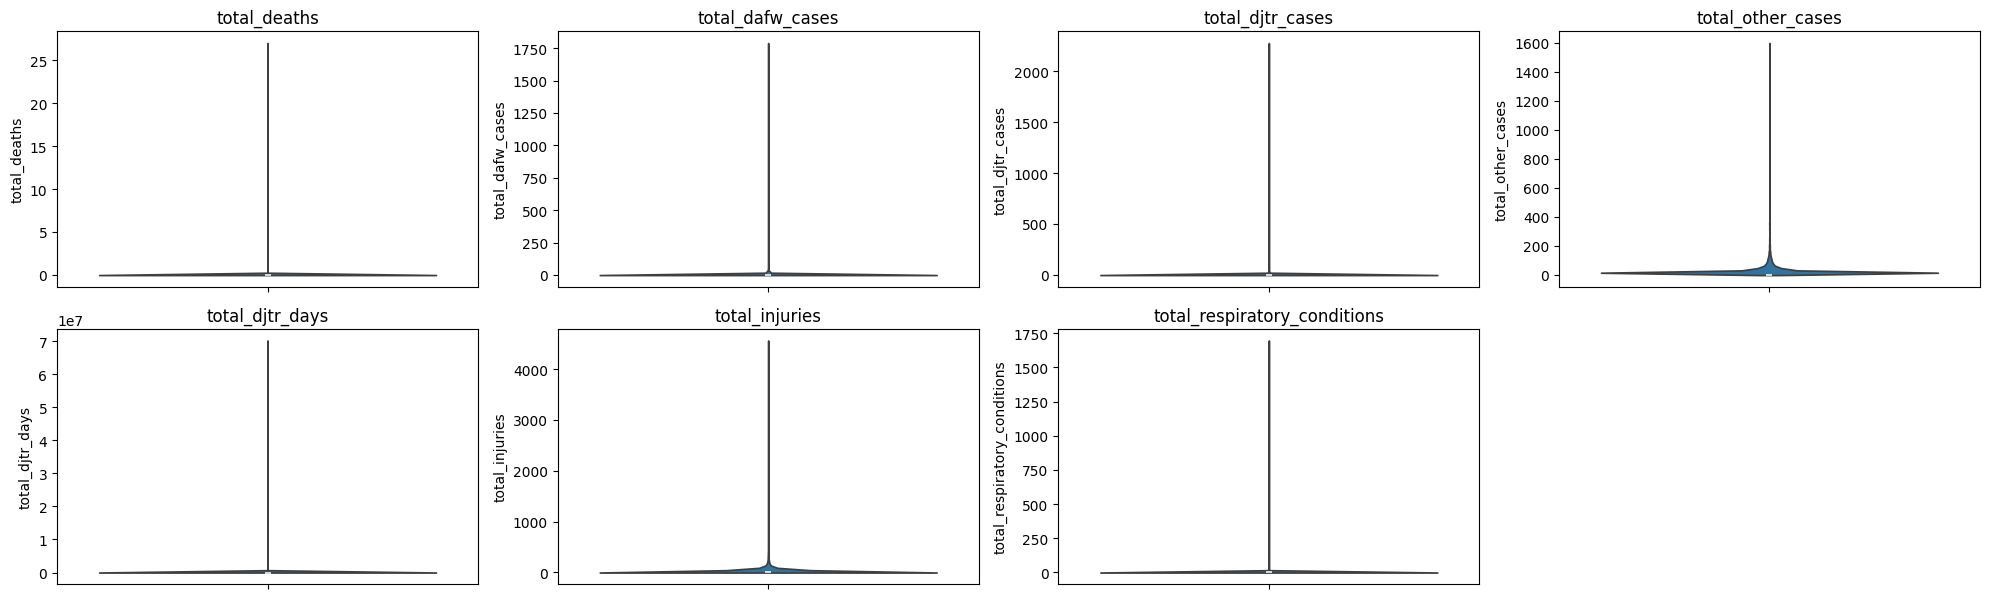

In [4]:
# Configurar el tamaño de los gráficos
plt.figure(figsize=(20, 12))

# Crear gráficos de violín para cada columna
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  # Configurar la cuadrícula para los gráficos
    sns.violinplot(y=df_ITA_Data[column])
    plt.title(column)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

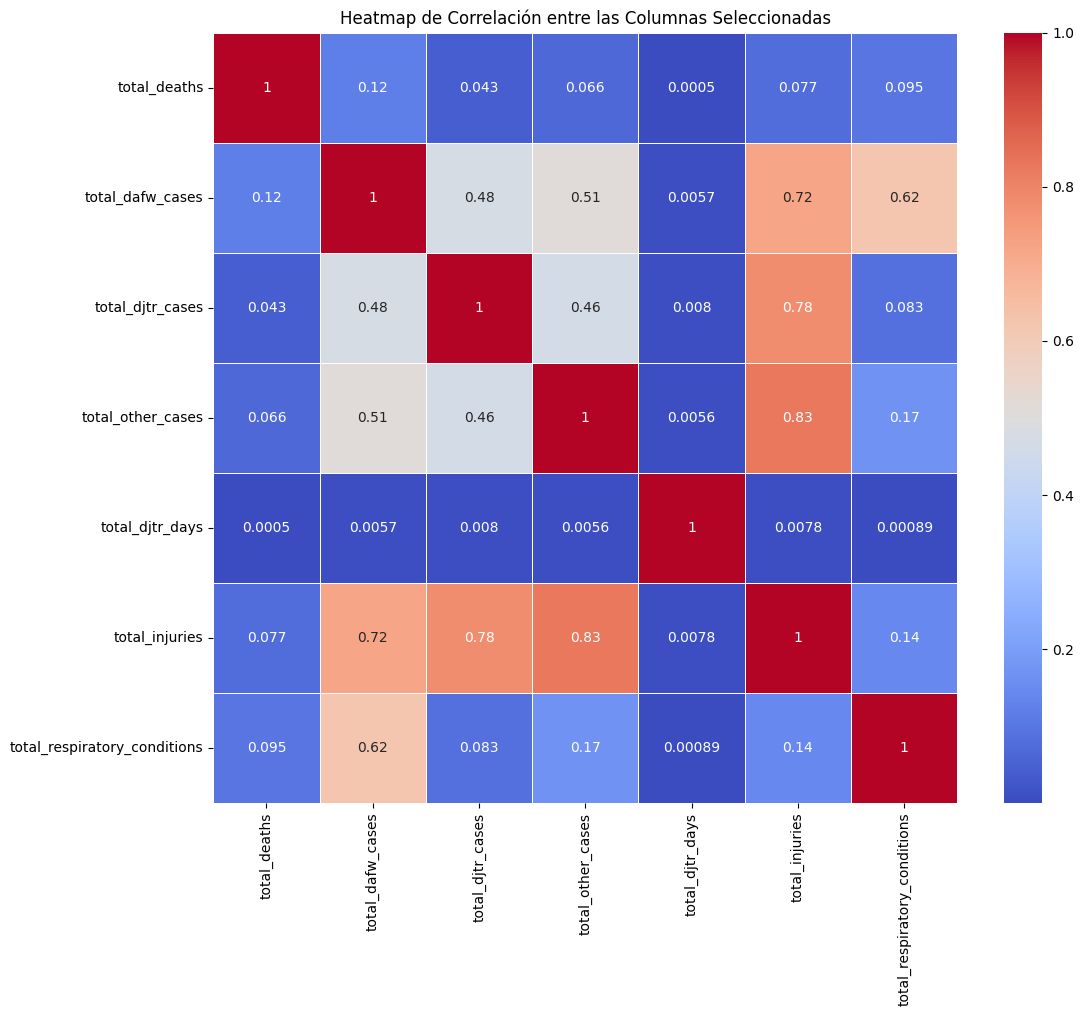

In [5]:
# Crear una matriz de correlación para las columnas seleccionadas
corr_matrix = df_ITA_Data[columns_to_plot].corr()

# Configurar el tamaño del heatmap
plt.figure(figsize=(12, 10))

# Crear el heatmap utilizando la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Ajustar la visualización y mostrar el heatmap
plt.title('Heatmap de Correlación entre las Columnas Seleccionadas')
plt.show()

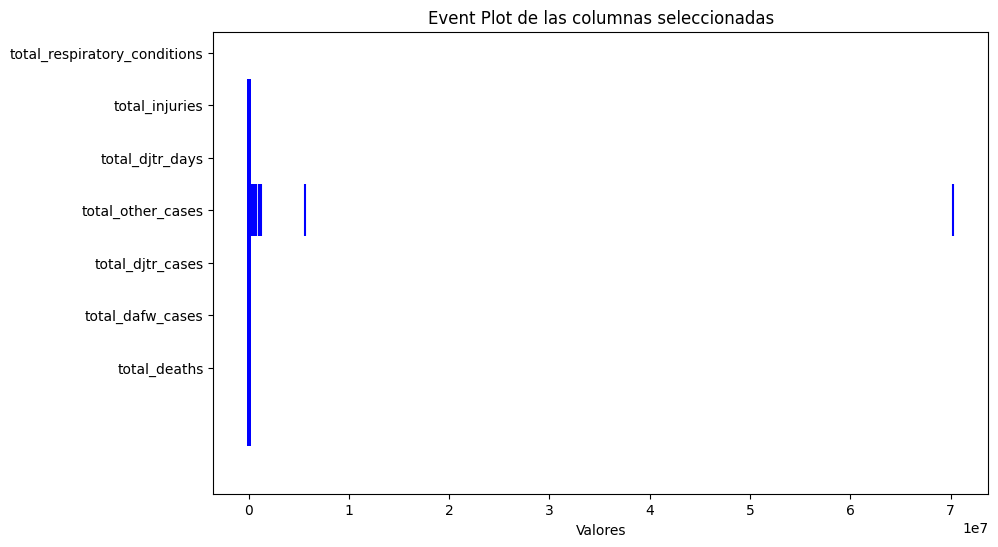

In [4]:
# Crear el event plot para las columnas seleccionadas
plt.figure(figsize=(10, 6))

# Convertir los datos de las columnas en una lista de arrays para el event plot
event_data = [df_ITA_Data[col].dropna().values for col in columns_to_plot]

# Crear el event plot
plt.eventplot(event_data, orientation='horizontal', colors='b')

# Configurar las etiquetas de los ejes
plt.yticks(ticks=np.arange(1, len(columns_to_plot) + 1), labels=columns_to_plot)
plt.xlabel('Valores')
plt.title('Event Plot de las columnas seleccionadas')

# Mostrar el gráfico
plt.show()

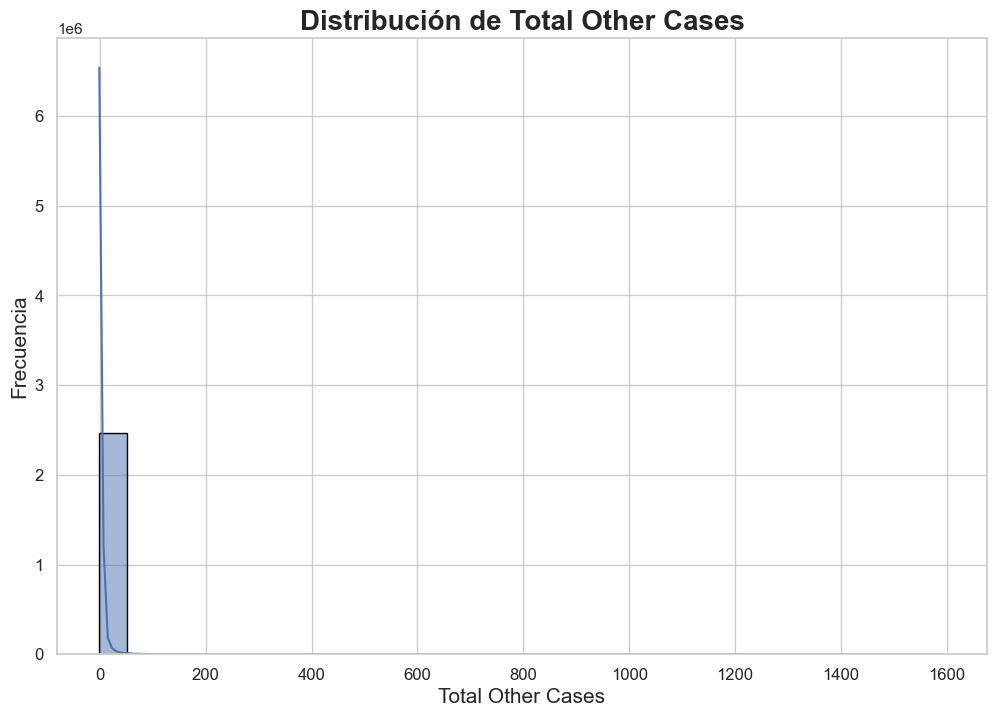

In [8]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear el gráfico de distribución
sns.histplot(df_ITA_Data['total_other_cases'], kde=True, color="b", bins=30, edgecolor='black')

# Añadir un título y etiquetas
plt.title('Distribución de Total Other Cases', fontsize=20, fontweight='bold')
plt.xlabel('Total Other Cases', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Personalizar las etiquetas y la visualización del gráfico
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

C:\Users\jhcat\AppData\Local\Temp\ipykernel_11824\1042748286.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


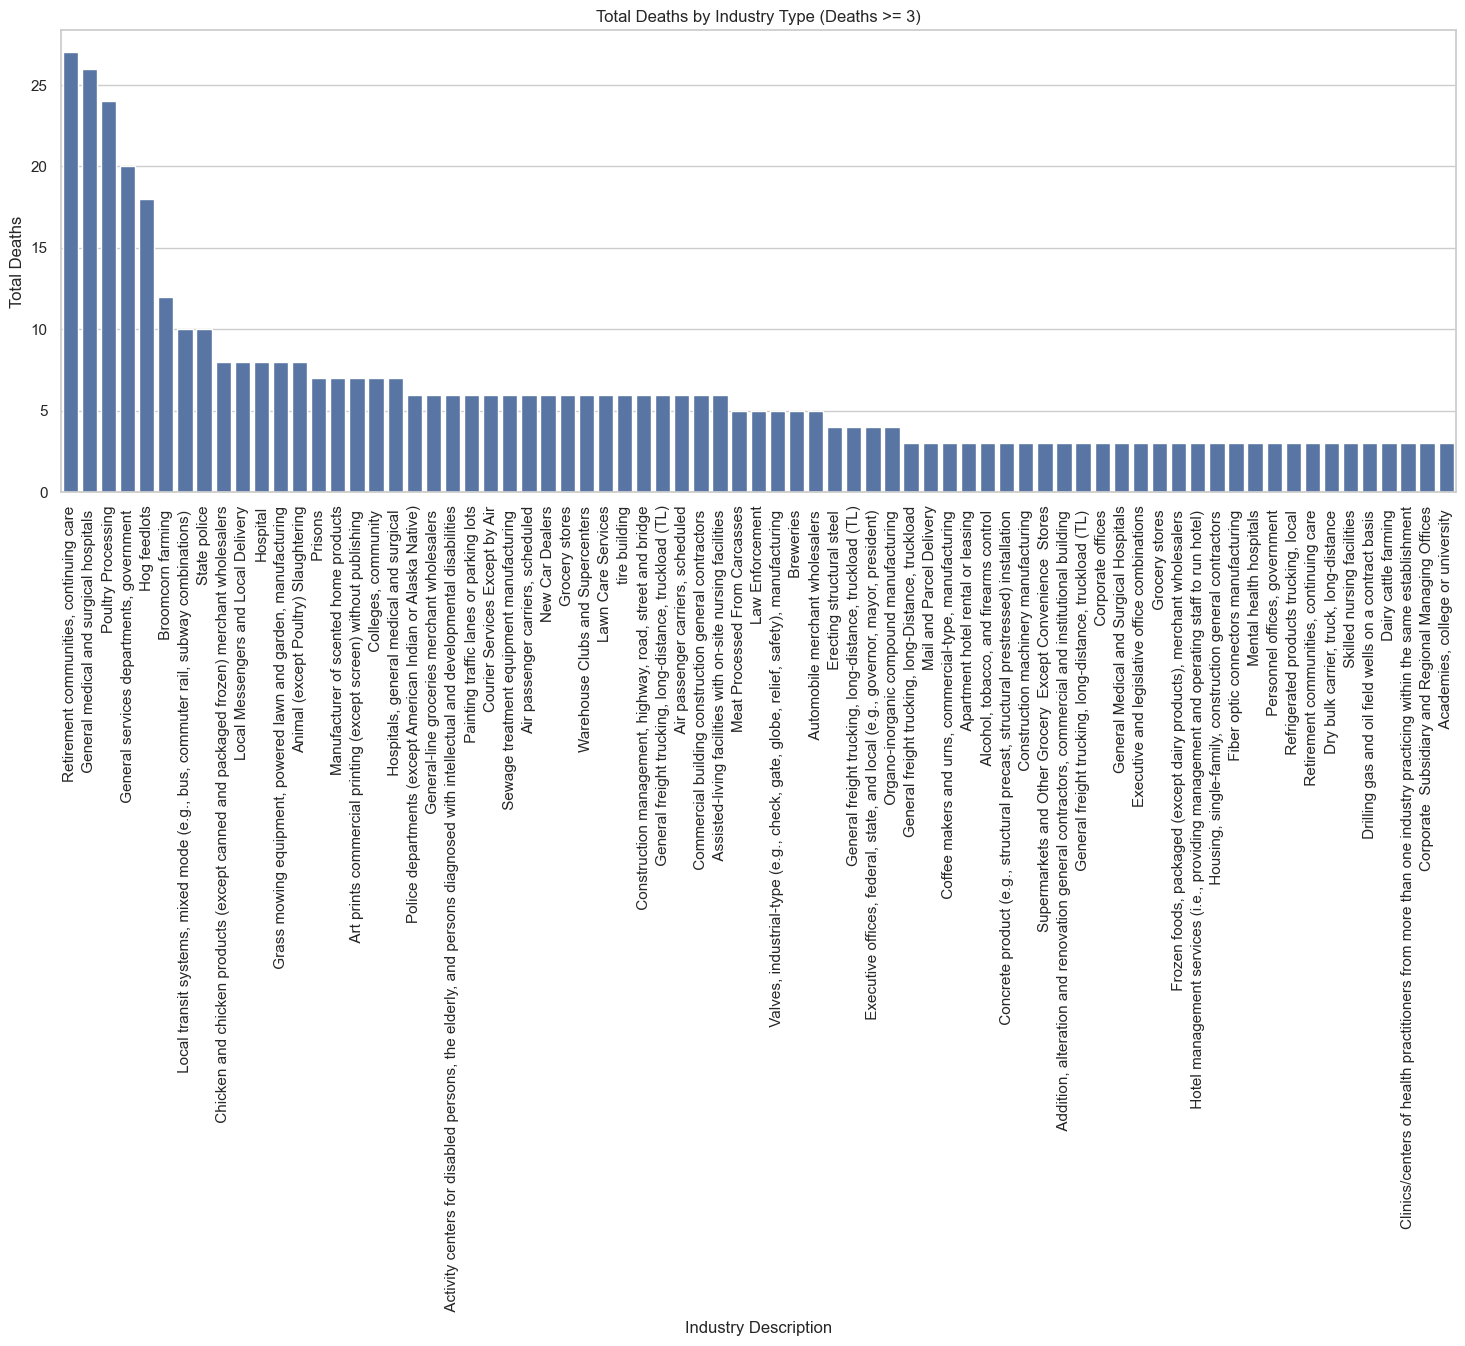

In [21]:
# Filtrar los datos con total_deaths > 3
df_filtered_type = df_ITA_Data[df_ITA_Data['total_deaths'] >= 3]

# Agrupar por industry_description, sumar total_deaths y ordenar de mayor a menor
df_grouped = df_filtered_type.groupby('industry_description').agg({'total_deaths': 'sum'}).reset_index()
df_grouped = df_grouped.sort_values(by='total_deaths', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
sns.barplot(x='industry_description', y='total_deaths', data=df_grouped, color='b')

# Añadir etiquetas y título
plt.xlabel('Industry Description')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Industry Type (Deaths >= 3)')
plt.xticks(rotation=90)  # Rotar etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\jhcat\AppData\Local\Temp\ipykernel_11824\3828587716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['company_name'] = df_filtered['company_name'].astype(str)


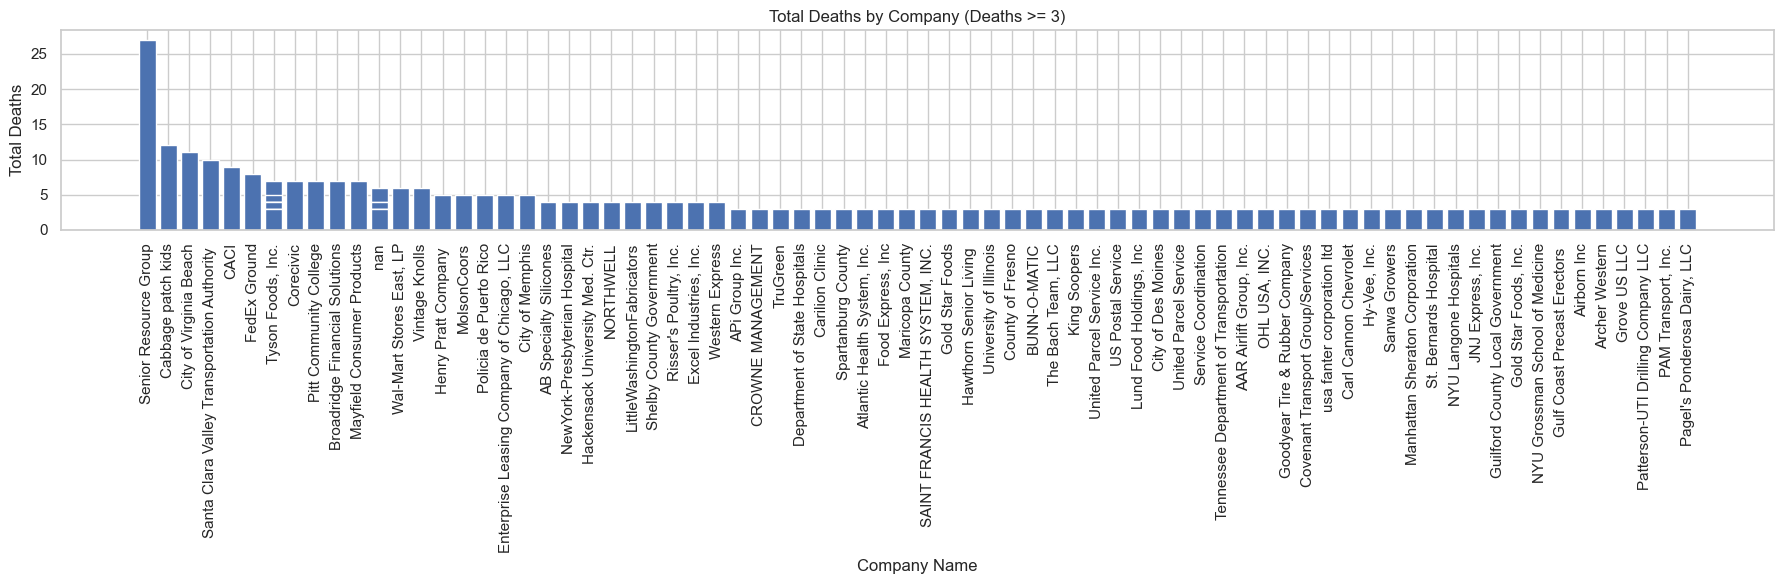

In [20]:
# Filtrar los datos para mostrar solo las compañías con total_deaths > 3
df_filtered = df_ITA_Data[df_ITA_Data['total_deaths'] >= 3]

# Convertir la columna 'company_name' a string y eliminar filas con NaN
df_filtered['company_name'] = df_filtered['company_name'].astype(str)

# Ordenar los datos de mayor a menor en total_deaths
df_filtered = df_filtered.sort_values(by='total_deaths', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(df_filtered['company_name'], df_filtered['total_deaths'], color='b')

# Añadir etiquetas y título
plt.xlabel('Company Name')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Company (Deaths >= 3)')
plt.xticks(rotation=90)  # Rotar etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()